To classify Black_Friday_sale.csv file using K-means clustering

    Find the buyer's age group and their product of interest
    Which Product category has the highest sales

In [146]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Exploratory Analysis

In [117]:
df = pd.read_csv("Black_friday_sale.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [118]:
df.shape

(550068, 12)

In [119]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [120]:
len(df['User_ID'].unique()), len(df['Product_ID'].unique())

(5891, 3631)

In [121]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [122]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [123]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [124]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [125]:
PC2_null_percent = (df['Product_Category_2'].isnull().sum()/len(df))*100
PC2_null_percent

31.56664266963357

In [126]:
PC3_null_percent = (df['Product_Category_3'].isnull().sum()/len(df))*100
PC3_null_percent

69.67265865311198

About 32% of Product_Category_2 and 70% of Product_Category_3 are null values.

In [127]:
df[['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Marital_Status', 'Product_Category_1']].astype('object').describe()

,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1
count,550068,550068,550068,550068,550068,550068,550068
unique,3631,2,7,21,3,2,20
top,P00265242,M,26-35,4,B,0,5
freq,1880,414259,219587,72308,231173,324731,150933


Basic observation:
    
    P00265242 is the top product
    Most purchases are done by men
    Most purchases are done by age group 26-35

### Data Preprocessing

#### Handling null values

As per the initial analysis, about 70% of Product_Category_3 values are null. So it is a better option to drop the column instead of replacing since replacing these many values may affect the output. But in Product_Category_2, we can replace the null values with mean.

In [128]:
df = df.drop(['Product_Category_3'], axis='columns')

In [129]:
mean = np.floor(df['Product_Category_2'].mean())
df['Product_Category_2'].fillna((mean),inplace=True)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 46.2+ MB


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 46.2+ MB


#### Data encoding

In [178]:
le = preprocessing.LabelEncoder()
le.fit(df.Age)
df.Age = le.transform(df.Age)

le1 = preprocessing.LabelEncoder()
le1.fit(df.Gender)
df.Gender = le1.transform(df.Gender)

le2 = preprocessing.LabelEncoder()
le2.fit(df.City_Category)
df.City_Category = le2.transform(df.City_Category)

le3 = preprocessing.LabelEncoder()
le3.fit(df.Stay_In_Current_City_Years)
df.Stay_In_Current_City_Years = le3.transform(df.Stay_In_Current_City_Years)


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int32  
 3   Age                         550068 non-null  int32  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int32  
 6   Stay_In_Current_City_Years  550068 non-null  int32  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(1), int32(4), int64(5), object(1)
memory usage: 37.8+ MB


In [134]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,9.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,9.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,9.0,7969


In [137]:
# finding out the optimum k value

X = df[['Age', 'Purchase']]

inertia_values=[]
k = range(1,10)
for i in k:
    model = KMeans(n_clusters=i)
    model.fit(X)
    inertia_values.append(model.inertia_)

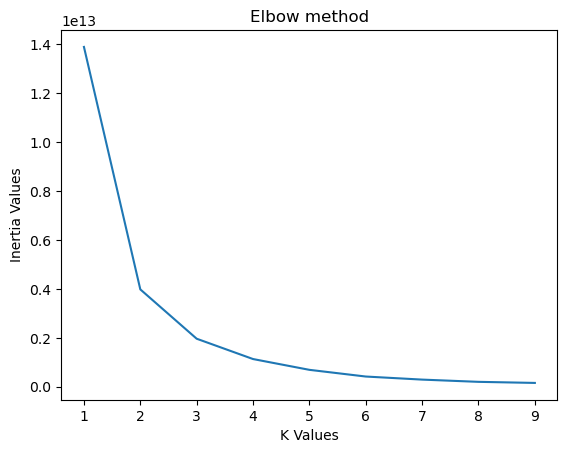

In [140]:
plt.plot(k,inertia_values)
plt.title("Elbow method")
plt.xlabel("K Values")
plt.ylabel("Inertia Values")

plt.show()

Since the elbow point is 3, choose k=3

In [141]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(X)
df['cluster'] = y_predicted
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,cluster
0,1000001,P00069042,0,0,10,0,2,0,3,9.0,8370,0
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,15200,1
2,1000001,P00087842,0,0,10,0,2,0,12,9.0,1422,2
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,1057,2
4,1000002,P00285442,1,6,16,2,4,0,8,9.0,7969,0


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


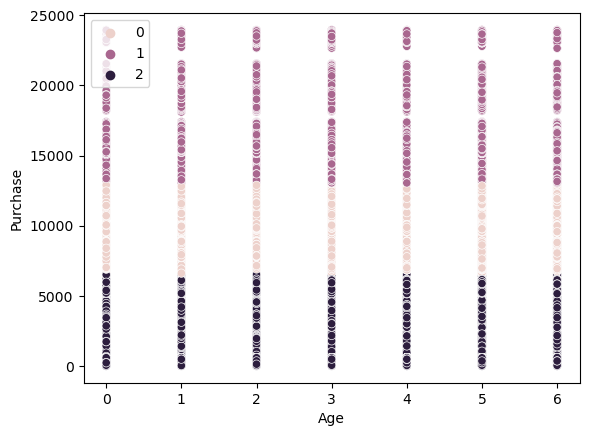

In [147]:
sns.scatterplot(data = X, x = 'Age', y = 'Purchase', hue = km.labels_)

In [148]:
# from the plot. it can be inferred that cluster 1 has the maximum sales.

df_new = df[df.cluster==1]

In [149]:
df_new.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,cluster
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,15200,1
5,1000003,P00193542,1,2,15,0,3,0,1,2.0,15227,1
6,1000004,P00184942,1,4,7,1,2,1,1,8.0,19215,1
7,1000004,P00346142,1,4,7,1,2,1,1,15.0,15854,1
8,1000004,P0097242,1,4,7,1,2,1,1,16.0,15686,1


In [ ]:
df_new.Age = le.inverse_transform(df_new.Age)

In [181]:
print("Different age groups and their favorite product ids: ")
age_by_product = df_new.groupby('Age')['Product_ID'].agg(pd.Series.mode).to_frame()
age_by_product

Different age groups and their favorite product ids: 


,Product_ID
Age,
0-17,P00237542
18-25,P00110742
26-35,P00025442
36-45,P00025442
46-50,P00025442
51-55,P00025442
55+,P00080342


In [171]:
df_new.groupby('Product_Category_1')['Purchase'].sum().max()


1282522972

In [172]:
df_new.groupby('Product_Category_2')['Purchase'].sum().max()

448407423

Product_Category_1 has the highest sales